In [1]:
import pandas as pd
from plotnine import *
from plotnine.composition import Beside
from plotnine.data import mpg

In [2]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


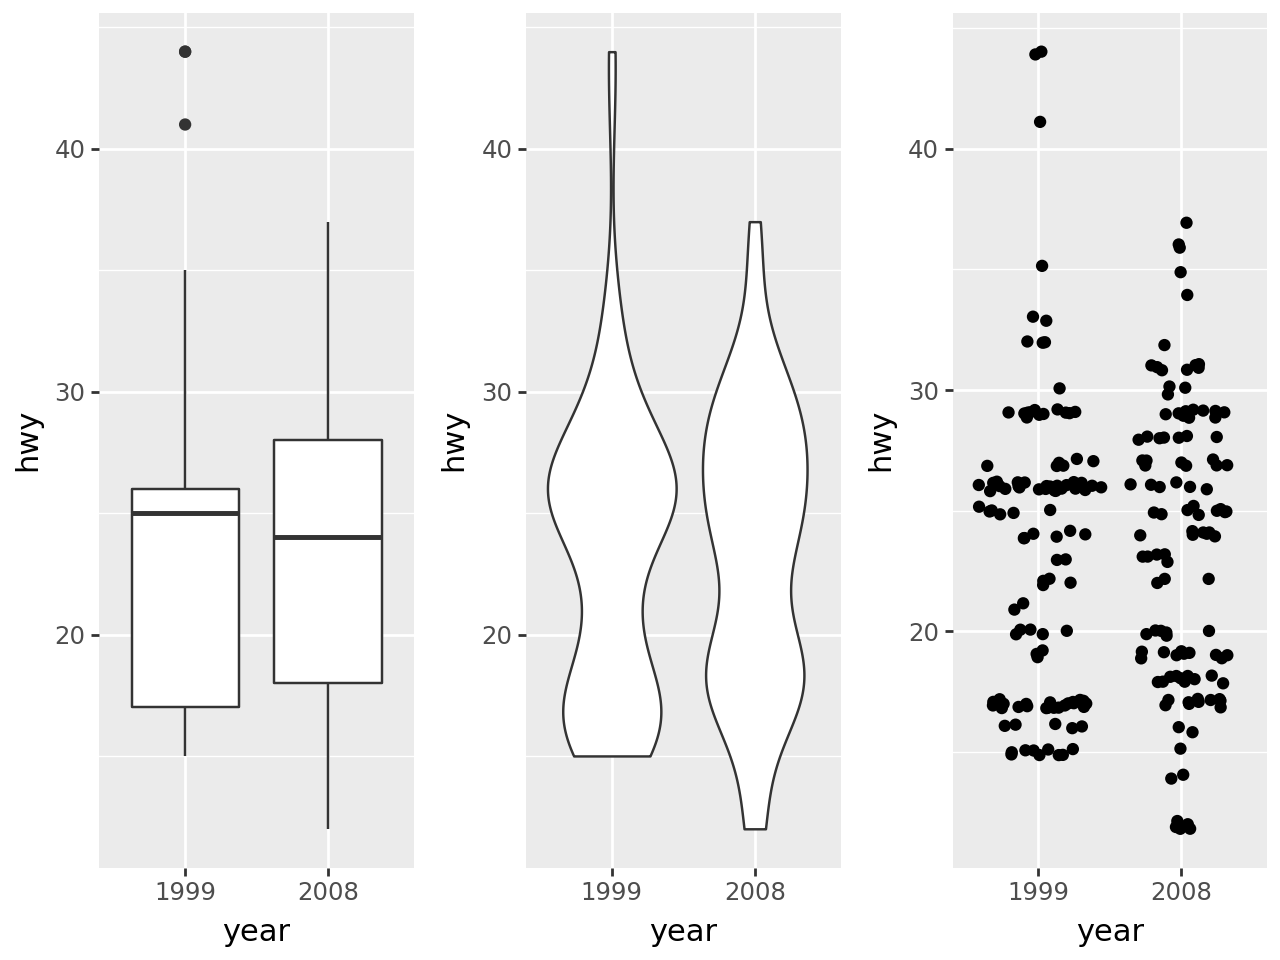

In [3]:
p = ggplot(mpg, aes("factor(year)", "hwy")) + labs(x="year")

p1 = p + geom_boxplot()
p2 = p + geom_violin()
p3 = p + geom_sina()

p1 | p2 | p3

Which is equivalent to

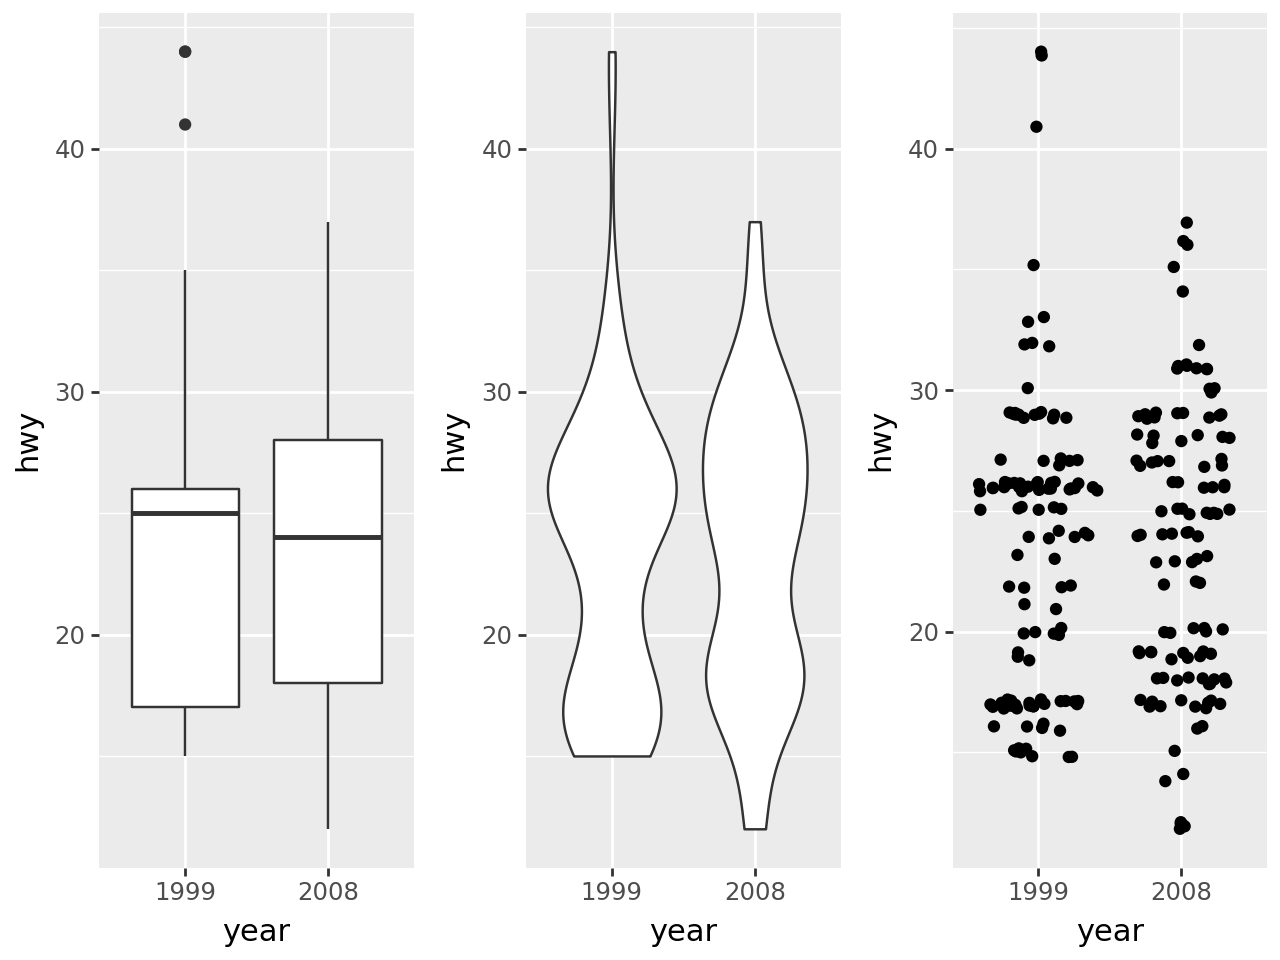

In [4]:
Beside([p1, p2, p3])

Remove unnecessary breaks and texts.

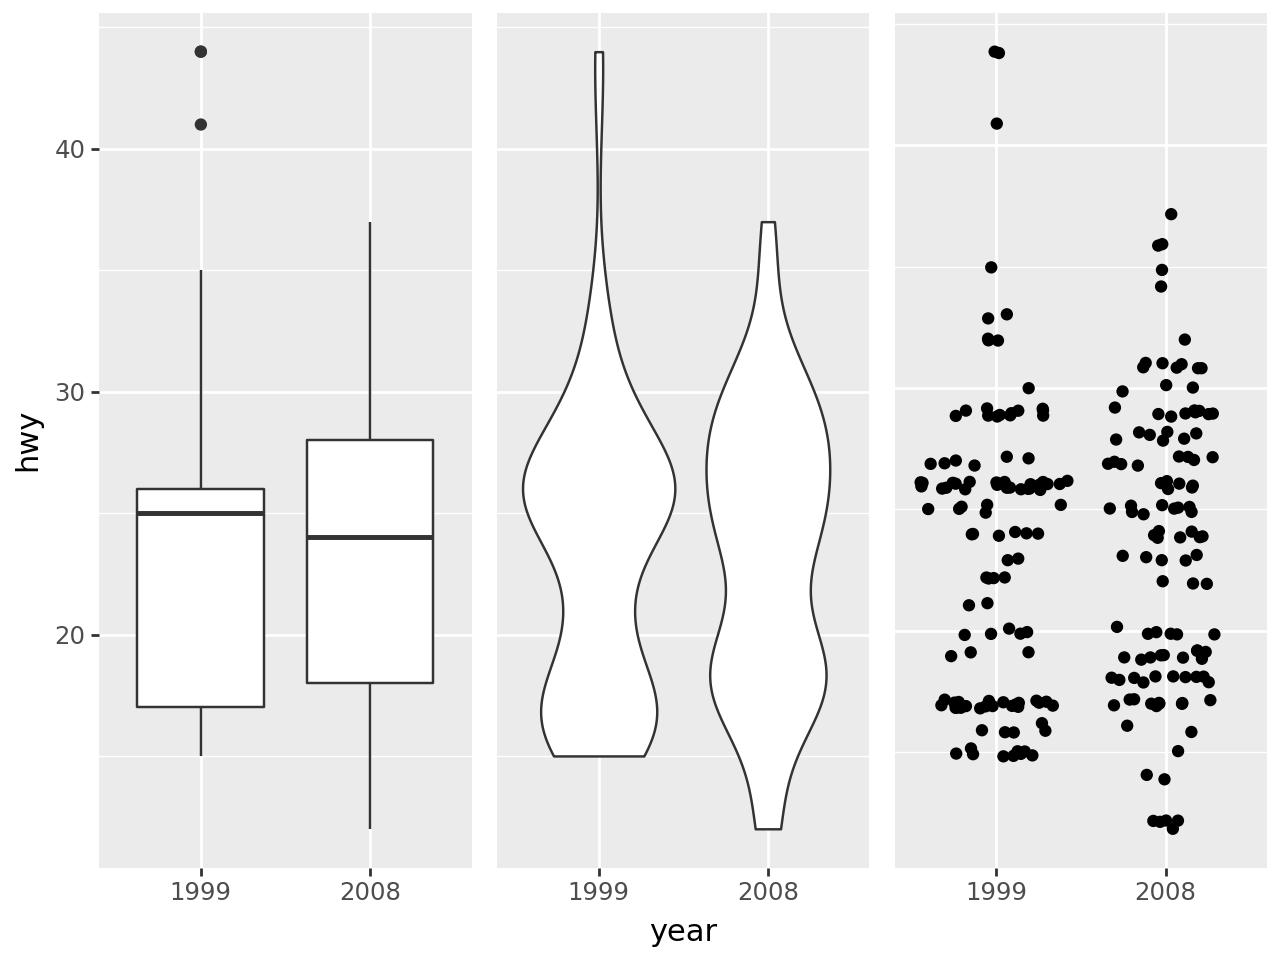

In [5]:
no_y = theme(
    axis_title_y=element_blank(),
    axis_text_y=element_blank(),
    axis_ticks_y=element_blank()
)
no_title_x = theme(axis_title_x=element_blank())

(p1 + no_title_x) | (p2 + no_y) | (p3 + no_y + no_title_x)

Each plot in the composition can have a completely different theme.

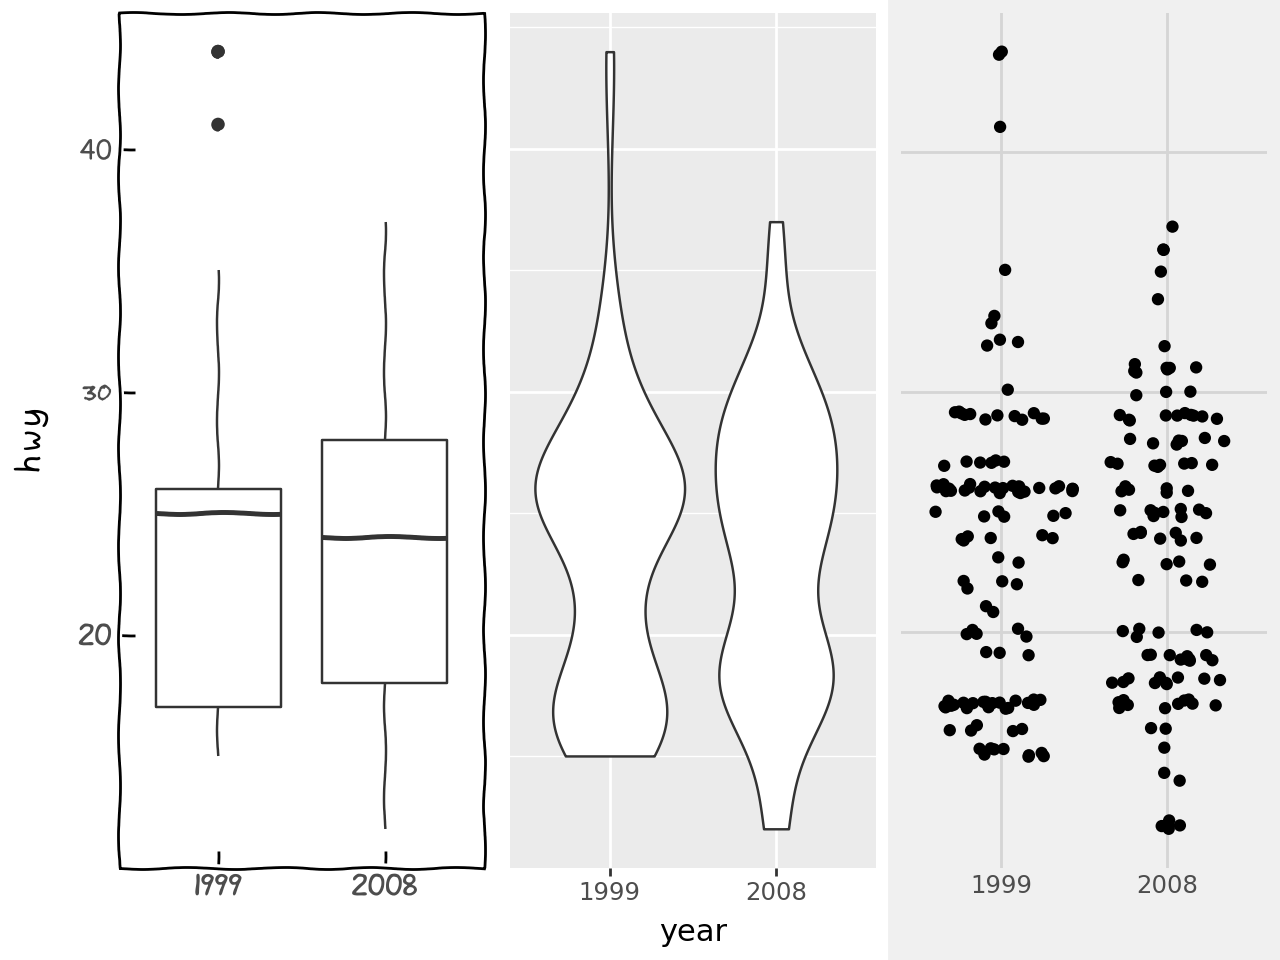

In [6]:
(p1 + theme_xkcd() + no_title_x) | (p2 + no_y) | (p3 + theme_538() + no_y + no_title_x)

The space taken up by the plots and "sub-compositions" is distributed equally with in the group.

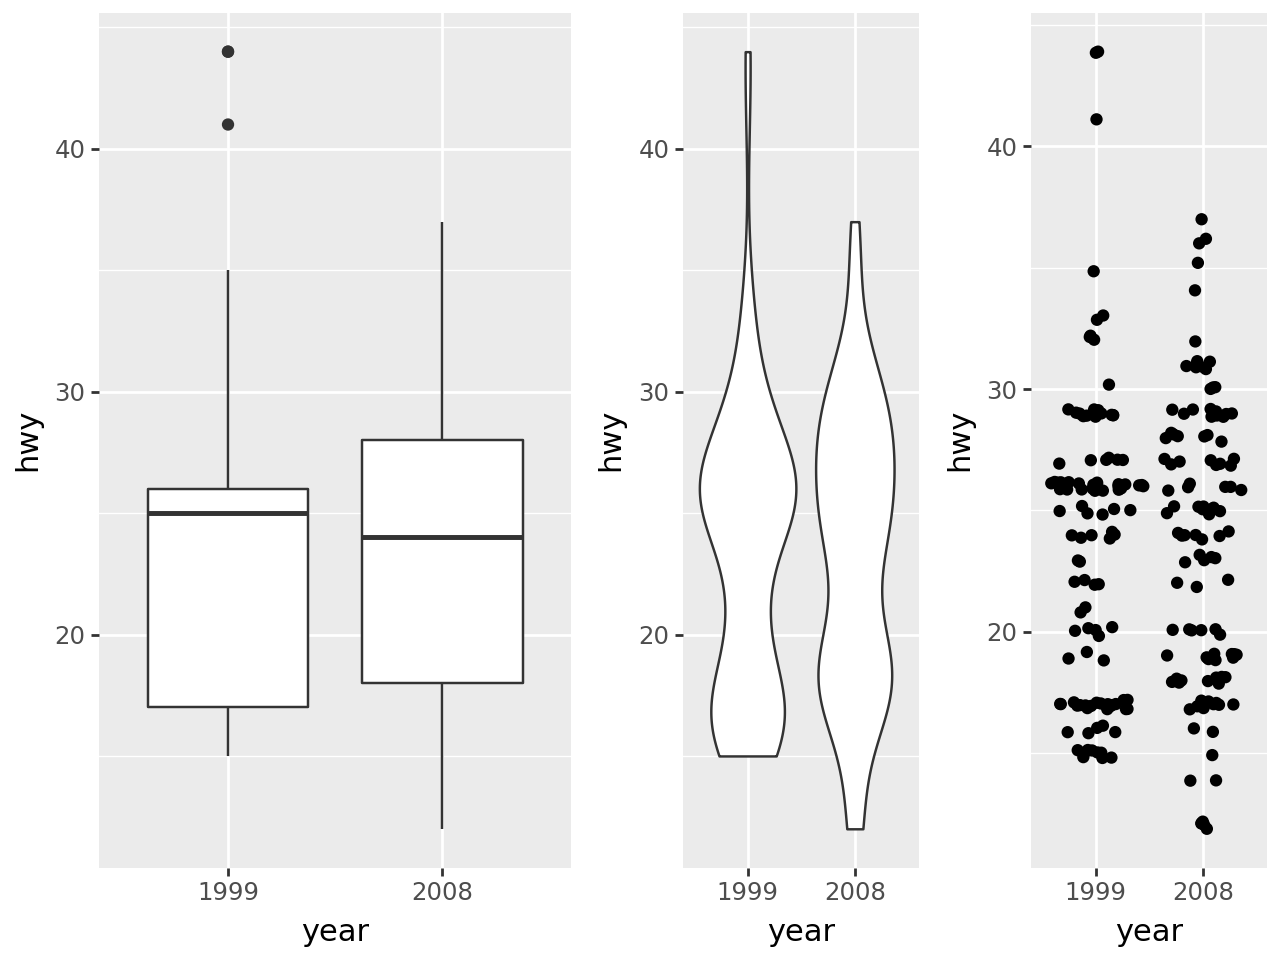

In [7]:
p1 | (p2 | p3)

Which is the same as:

```python
Beside([p1, Beside([p2, p3])])
```